In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
df=pd.read_csv('data.csv')
df

,CountyName,State,Latitude,Longitude,Date,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,...,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
0,Adams,Washington,46.929839,-118.352109,11/30/2014 0:00,18.61,-3.01,0.00,6.77,0.69,...,0,1027.95,23.93,6.96,10.00,9,3.80,136.179718,0,35.6
1,Adams,Washington,47.150327,-118.958859,11/30/2014 0:00,19.67,-0.74,0.00,6.66,0.65,...,0,1028.26,25.88,8.71,10.00,352,6.03,135.697540,0,35.6
2,Adams,Washington,46.811686,-118.695237,11/30/2014 0:00,20.66,-0.14,0.00,6.55,0.67,...,0,1028.29,24.67,8.26,10.00,25,3.59,135.676956,0,35.6
3,Adams,Washington,47.162342,-118.699677,11/30/2014 0:00,19.69,-2.66,0.03,7.32,0.69,...,0,1027.74,25.48,8.10,10.00,1,5.18,135.005798,0,35.6
4,Adams,Washington,47.157512,-118.434056,11/30/2014 0:00,18.82,-3.04,0.04,7.62,0.70,...,0,1027.16,24.83,8.32,9.99,5,4.69,134.803864,0,35.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182544,Miami,Kansas,38.693595,-94.671846,6/3/2015 0:00,75.44,64.29,0.13,62.74,0.84,...,0,1013.01,75.44,64.29,9.31,133,6.26,134.803101,185,50.1
182545,Miami,Kansas,38.603699,-94.992247,6/3/2015 0:00,75.47,64.49,0.13,62.83,0.84,...,0,1012.99,75.47,64.49,9.29,132,6.29,133.913879,185,50.1
182546,Miami,Kansas,38.580826,-94.794660,6/3/2015 0:00,75.40,64.43,0.13,62.77,0.84,...,0,1013.01,75.40,64.43,9.28,132,6.27,129.938950,185,50.1
182547,Miami,Kansas,38.564866,-94.748021,6/3/2015 0:00,75.35,64.44,0.13,62.74,0.84,...,0,1013.01,75.35,64.44,9.28,132,6.26,129.938950,185,50.1


In [4]:
# drop unwanted columns.
df = df.drop(['CountyName'], axis=1)
df = df.drop(['State'], axis=1)
df = df.drop(['Date'], axis=1)
df = df.drop(['cloudCover'], axis=1)
df = df.drop(['dewPoint'], axis=1)
df = df.drop(['precipIntensity'], axis=1)
df.head()

,Latitude,Longitude,apparentTemperatureMax,apparentTemperatureMin,humidity,precipIntensityMax,precipProbability,precipAccumulation,precipTypeIsRain,precipTypeIsSnow,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
0,46.929839,-118.352109,18.61,-3.01,0.69,0.0,0.0,0.0,0,0,0,1027.95,23.93,6.96,10.00,9,3.80,136.179718,0,35.6
1,47.150327,-118.958859,19.67,-0.74,0.65,0.0,0.0,0.0,0,0,0,1028.26,25.88,8.71,10.00,352,6.03,135.697540,0,35.6
2,46.811686,-118.695237,20.66,-0.14,0.67,0.0,0.0,0.0,0,0,0,1028.29,24.67,8.26,10.00,25,3.59,135.676956,0,35.6
3,47.162342,-118.699677,19.69,-2.66,0.69,0.0,0.0,0.0,0,0,0,1027.74,25.48,8.10,10.00,1,5.18,135.005798,0,35.6
4,47.157512,-118.434056,18.82,-3.04,0.70,0.0,0.0,0.0,0,0,0,1027.16,24.83,8.32,9.99,5,4.69,134.803864,0,35.6


In [5]:
df = df.drop(['precipIntensityMax'], axis=1)
df = df.drop(['precipProbability'], axis=1)
df = df.drop(['precipAccumulation'], axis=1)
df = df.drop(['precipTypeIsRain'], axis=1)
df = df.drop(['precipTypeIsSnow'], axis=1)
df = df.drop(['precipTypeIsOther'], axis=1)


In [6]:
df = df.drop(['visibility'], axis=1)
df = df.drop(['windBearing'], axis=1)
df = df.drop(['windSpeed'], axis=1)
df = df.drop(['NDVI'], axis=1)
df = df.drop(['DayInSeason'], axis=1)



In [7]:
# rename columns.
df = df.rename(index=str, columns={"apparentTemperatureMax":"ATMAX"})
df = df.rename(index=str, columns={"apparentTemperatureMin":"ATMIN"})
df = df.rename(index=str, columns={"temperatureMax":"tempmax"})
df = df.rename(index=str, columns={"temperatureMin":"tempmin"})
df.head()

,Latitude,Longitude,ATMAX,ATMIN,humidity,pressure,tempmax,tempmin,Yield
0,46.929839,-118.352109,18.61,-3.01,0.69,1027.95,23.93,6.96,35.6
1,47.150327,-118.958859,19.67,-0.74,0.65,1028.26,25.88,8.71,35.6
2,46.811686,-118.695237,20.66,-0.14,0.67,1028.29,24.67,8.26,35.6
3,47.162342,-118.699677,19.69,-2.66,0.69,1027.74,25.48,8.10,35.6
4,47.157512,-118.434056,18.82,-3.04,0.70,1027.16,24.83,8.32,35.6


In [8]:
df.isnull().sum()

Latitude       0
Longitude      0
ATMAX          0
ATMIN          0
humidity       0
pressure     351
tempmax        0
tempmin        0
Yield          0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['pressure']] = imputer.fit_transform(df[['pressure']])

In [10]:
df.isnull().sum()

Latitude     0
Longitude    0
ATMAX        0
ATMIN        0
humidity     0
pressure     0
tempmax      0
tempmin      0
Yield        0
dtype: int64

In [11]:
#max value of yield
column = df["Yield"]
column.shape
max_value = column.max()
print(max_value)

78.0


In [12]:
#index of max value
column = df["Yield"]
column.shape
max_index = column.idxmax()
print(max_index)

281


In [40]:
X = df.iloc[:, :-1]
y = df.iloc[:,8]

In [41]:
X.describe

<bound method NDFrame.describe of          Latitude   Longitude  ATMAX  ATMIN  humidity  pressure  tempmax  \
0       46.929839 -118.352109  18.61  -3.01      0.69   1027.95    23.93   
1       47.150327 -118.958859  19.67  -0.74      0.65   1028.26    25.88   
2       46.811686 -118.695237  20.66  -0.14      0.67   1028.29    24.67   
3       47.162342 -118.699677  19.69  -2.66      0.69   1027.74    25.48   
4       47.157512 -118.434056  18.82  -3.04      0.70   1027.16    24.83   
...           ...         ...    ...    ...       ...       ...      ...   
182544  38.693595  -94.671846  75.44  64.29      0.84   1013.01    75.44   
182545  38.603699  -94.992247  75.47  64.49      0.84   1012.99    75.47   
182546  38.580826  -94.794660  75.40  64.43      0.84   1013.01    75.40   
182547  38.564866  -94.748021  75.35  64.44      0.84   1013.01    75.35   
182548  38.392008  -94.855430  75.27  64.57      0.84   1013.00    75.27   

        tempmin  
0          6.96  
1          8.71  

In [42]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [44]:
model = keras.models.load_model("my_new_model.h5")

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


name    51649     26.7
13864     42.2
124617    44.4
1...
Name: Yield, dtype: object

array([51649     26.7
13864     42.2
124617    44.4
148071    34.5
126886    31.1
          ... 
120802    33.2
132687    35.8
142369    42.6
11535     34.9
50569     27.4
Name: Yield, Length: 45638, dtype: float64], dtype=object)

[[23.170937]
 [33.90714 ]
 [43.107765]
 ...
 [39.811413]
 [31.234035]
 [26.14993 ]]


In [51]:
y_pred.shape

(45638, 1)

[[23.170937]
 [33.90714 ]
 [43.107765]
 ...
 [39.811413]
 [31.234035]
 [26.14993 ]]


In [23]:
y_test[:3]

51649     26.7
13864     42.2
124617    44.4
Name: Yield, dtype: float64

In [24]:
# Predicting the sigle observation results. look the observation number 102981
a = [-0.11927456,  0.00434749, -1.10499803, -0.4401284 ,  1.12482087,
        0.86011432, -1.07609788, -0.52140108]
b = np.array(a)
b = b.reshape(1, -1)
y_pred_single_obs = model.predict(b)
round(float(y_pred_single_obs), 2)


23.17

In [25]:
# Predicting the sigle observation results. look the observation number 102981
from sklearn.externals import joblib
Latitude = -0.11927456
Longitude= 0.00434749
ATMAX = -1.10499803
ATMIN = -0.4401284
humidity =1.12482087
pressure=0.86011432
tempmax=-1.07609788
tempmin=-0.52140108
pred_args = [Latitude,Longitude,ATMAX,ATMIN,humidity,pressure,tempmax,tempmin]
pred_args_arr = np.array(pred_args)
pred_args_arr = pred_args_arr.reshape(1, -1)
model_prediction = model.predict(pred_args_arr)

round(float(model_prediction), 2)

/home/kanhaiya/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


23.17

In [26]:

import seaborn as sns
from pandas import DataFrame

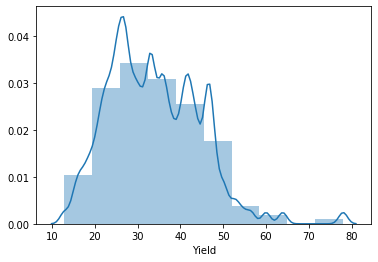

In [27]:
sns.distplot(df['Yield'],bins=10,kde=True)

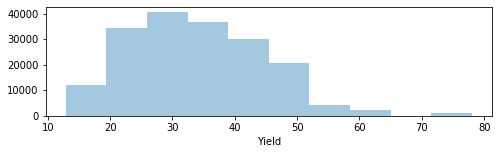

In [28]:
fig,ax=plt.subplots(figsize=(8,2))
sns.distplot(df['Yield'],bins=10,kde=False,ax=ax)

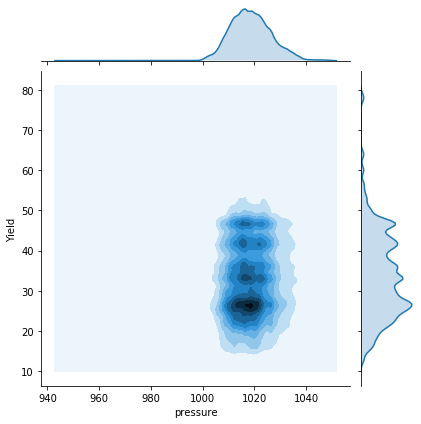

In [29]:
sns.jointplot('pressure','Yield',data=df,kind='kde')

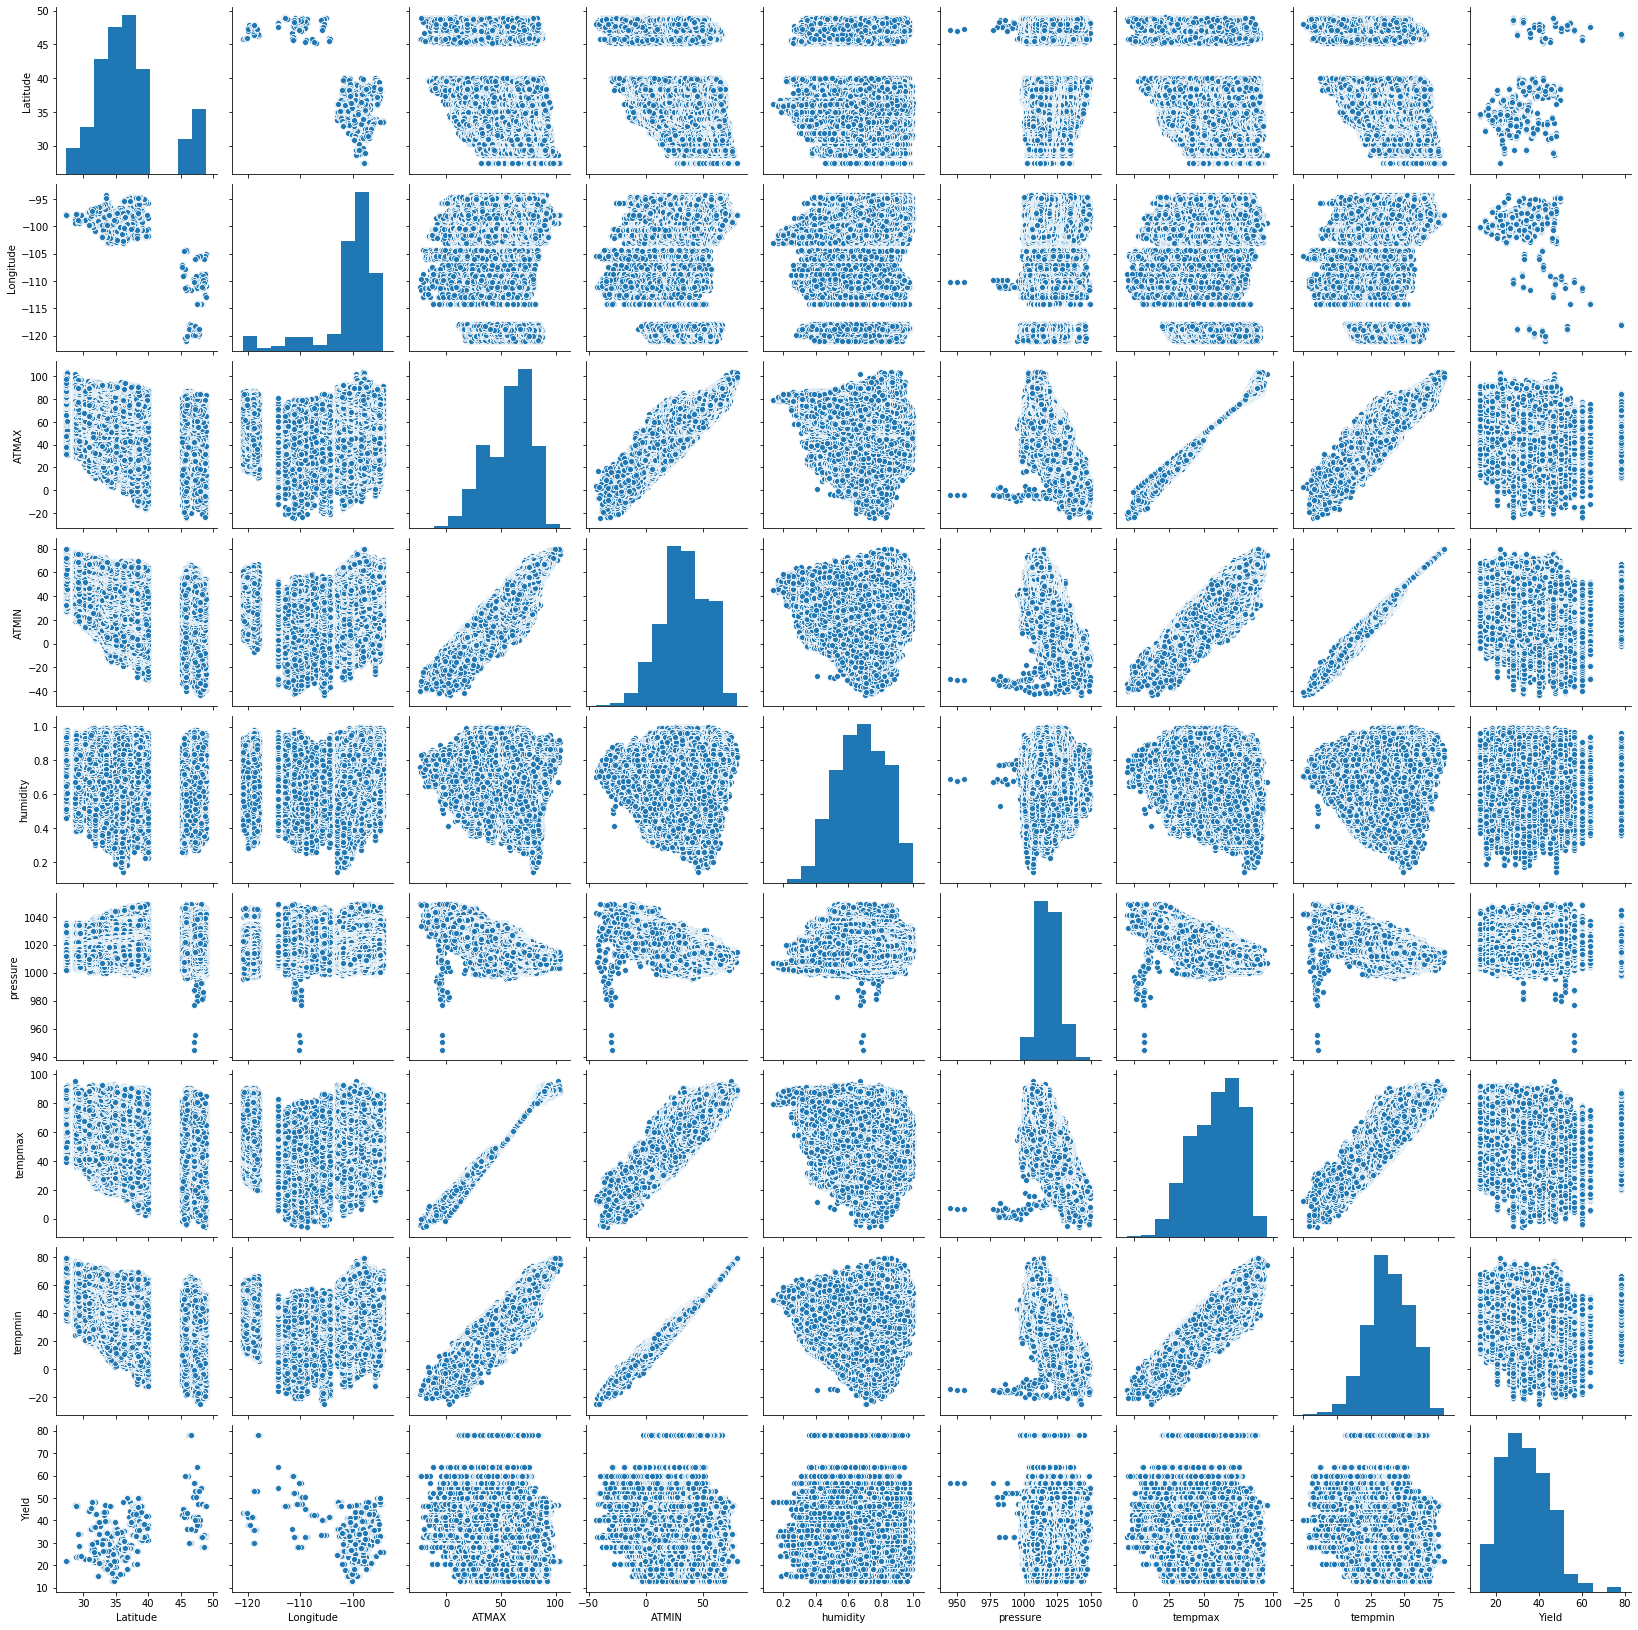

In [30]:
sns.pairplot(df)

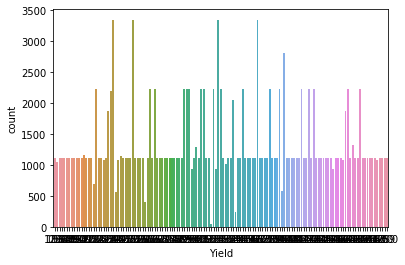

In [32]:
sns.countplot(x='Yield',data=df)

In [33]:
y_test

51649     26.7
13864     42.2
124617    44.4
148071    34.5
126886    31.1
          ... 
120802    33.2
132687    35.8
142369    42.6
11535     34.9
50569     27.4
Name: Yield, Length: 45638, dtype: float64

In [36]:
y_pred.shape

(3, 1)